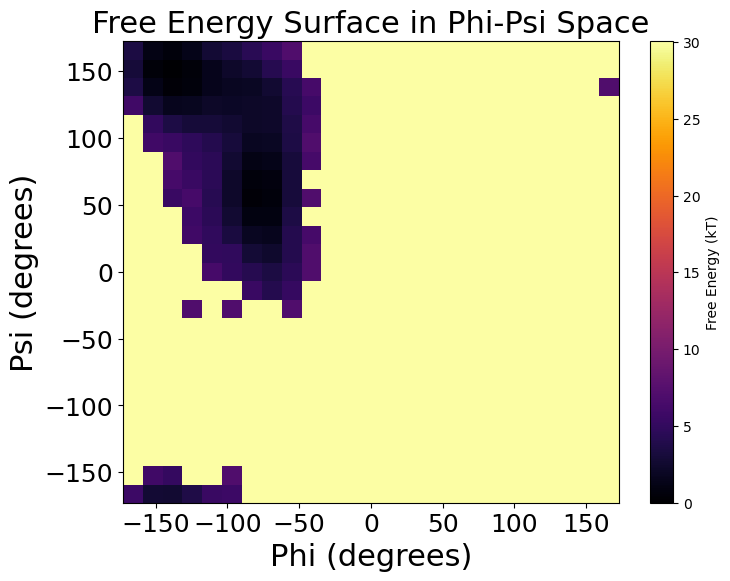

In [2]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

def compute_fes(traj, bins=25, range_bins=[[-180, 180], [-180, 180]]):
    """
    Computes the free energy surface (FES) in phi-psi space from a molecular dynamics trajectory.
    
    Parameters:
    traj (mdtraj.Trajectory): MDTraj trajectory object
    bins (int): Number of bins to use for the histogram
    range_bins (list): Range of phi and psi values (default: full range [-180, 180])
    
    Returns:
    free_energy (np.ndarray): Free energy surface on the grid
    x_centers (np.ndarray): Phi bin centers
    y_centers (np.ndarray): Psi bin centers
    """
    # Compute phi and psi dihedral angles (convert to degrees)
    phi_indices, phis = md.compute_phi(traj)
    psi_indices, psis = md.compute_psi(traj)
    phis_deg = np.rad2deg(phis[:, 0])
    psis_deg = np.rad2deg(psis[:, 0])
    
    # Create a 2D histogram of phi and psi
    hist, xedges, yedges = np.histogram2d(phis_deg, psis_deg, bins=bins, range=range_bins)
    
    # Avoid log(0) by replacing zeros with a very small number
    hist = np.clip(hist, 1e-10, None)
    
    # Compute free energy surface: F(phi, psi) = -log(histogram)
    free_energy = -np.log(hist)
    
    # Shift F(phi, psi) so that the minimum is zero
    free_energy -= np.min(free_energy)
    
    # Compute the bin centers for plotting
    x_centers = (xedges[:-1] + xedges[1:]) / 2
    y_centers = (yedges[:-1] + yedges[1:]) / 2
    
    return free_energy, x_centers, y_centers

def plot_fes(free_energy, x_centers, y_centers):
    """
    Plots the free energy surface (FES) in phi-psi space.
    
    Parameters:
    free_energy (np.ndarray): Free energy surface on the grid
    x_centers (np.ndarray): Phi bin centers
    y_centers (np.ndarray): Psi bin centers
    """
    plt.figure(figsize=(8, 6))
    
    # Plot using imshow, with origin='lower' to get correct orientation
    extent = [x_centers[0], x_centers[-1], y_centers[0], y_centers[-1]]
    
    # Capture the result of imshow so we can use it for the colorbar
    img = plt.imshow(free_energy.T, extent=extent, origin='lower', aspect='auto', cmap='inferno')

    # Add labels, title, and colorbar
    plt.xlabel('Phi (degrees)', fontsize=22)
    plt.ylabel('Psi (degrees)', fontsize=22)
    plt.title('Free Energy Surface in Phi-Psi Space', fontsize=22)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    # Use the 'img' object for the colorbar
    plt.colorbar(img, label='Free Energy (kT)')
    
    # Save the figure in the Figures folder
    plt.savefig('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/Figures/free_energy_surface_phi_psi.png', dpi=300)
    
    # Show the plot
    plt.show()

# Load the trajectory
traj = md.load('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/setup/alanine_dipeptide/md_alanine.trr', top='/home/yl12451/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/setup/alanine_dipeptide/md_alanine.gro')

# Compute the free energy surface
free_energy, x_centers, y_centers = compute_fes(traj, bins=25)

# Plot the free energy surface
plot_fes(free_energy, x_centers, y_centers)


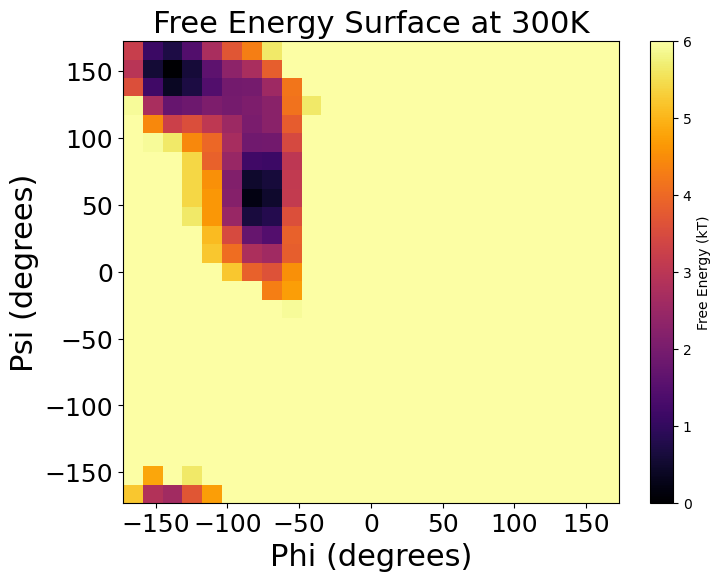

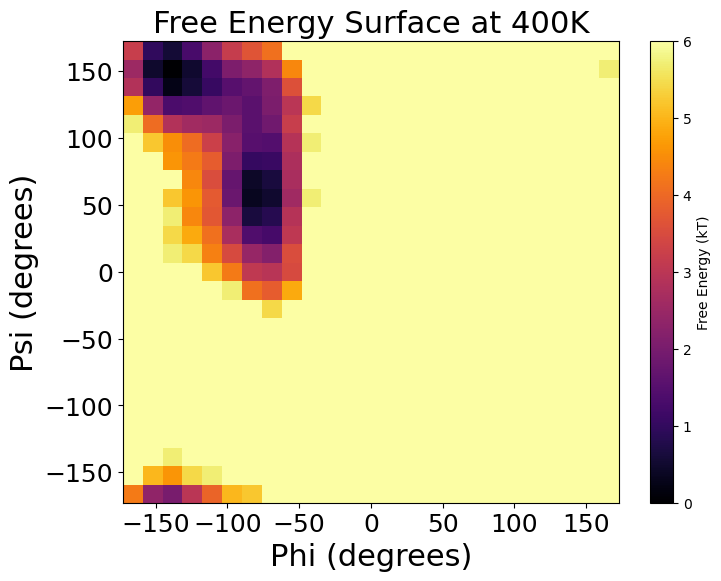

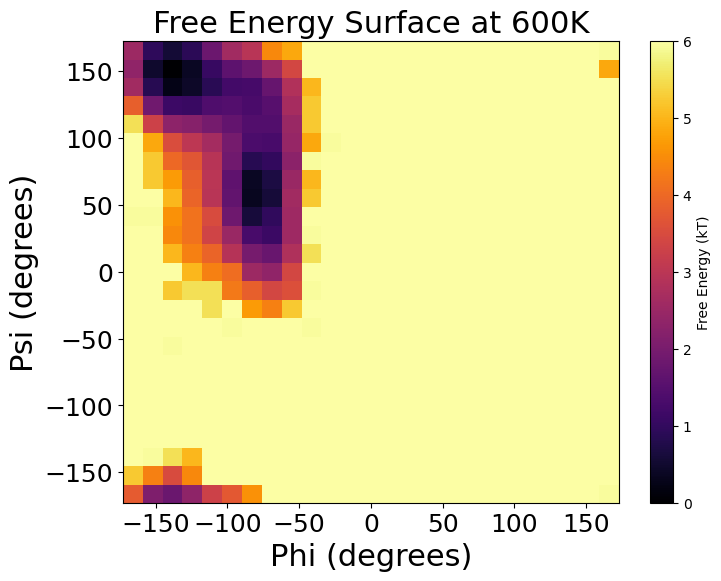

In [4]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

def compute_fes(traj, bins=25, range_bins=[[-180, 180], [-180, 180]], fes_max=6):
    """
    Computes the free energy surface (FES) in phi-psi space from a molecular dynamics trajectory.
    
    Parameters:
    traj (mdtraj.Trajectory): MDTraj trajectory object
    bins (int): Number of bins to use for the histogram
    range_bins (list): Range of phi and psi values (default: full range [-180, 180])
    fes_max (float): Maximum value for the free energy surface (default: 6 kT)
    
    Returns:
    free_energy (np.ndarray): Free energy surface on the grid
    x_centers (np.ndarray): Phi bin centers
    y_centers (np.ndarray): Psi bin centers
    """
    # Compute phi and psi dihedral angles (convert to degrees)
    phi_indices, phis = md.compute_phi(traj)
    psi_indices, psis = md.compute_psi(traj)
    phis_deg = np.rad2deg(phis[:, 0])
    psis_deg = np.rad2deg(psis[:, 0])
    
    # Create a 2D histogram of phi and psi
    hist, xedges, yedges = np.histogram2d(phis_deg, psis_deg, bins=bins, range=range_bins)
    
    # Avoid log(0) by replacing zeros with a very small number
    hist = np.clip(hist, 1e-10, None)
    
    # Compute free energy surface: F(phi, psi) = -log(histogram)
    free_energy = -np.log(hist)
    
    # Shift F(phi, psi) so that the minimum is zero
    free_energy -= np.min(free_energy)
    
    # Clip the free energy to the maximum value of 6 kT
    free_energy = np.clip(free_energy, None, fes_max)
    
    # Compute the bin centers for plotting
    x_centers = (xedges[:-1] + xedges[1:]) / 2
    y_centers = (yedges[:-1] + yedges[1:]) / 2
    
    return free_energy, x_centers, y_centers

def plot_fes(free_energy, x_centers, y_centers, temperature):
    """
    Plots the free energy surface (FES) in phi-psi space for a given temperature.
    
    Parameters:
    free_energy (np.ndarray): Free energy surface on the grid
    x_centers (np.ndarray): Phi bin centers
    y_centers (np.ndarray): Psi bin centers
    temperature (int): Temperature value for labeling the plot
    """
    plt.figure(figsize=(8, 6))
    
    # Plot using imshow, with origin='lower' to get correct orientation
    extent = [x_centers[0], x_centers[-1], y_centers[0], y_centers[-1]]
    
    # Capture the result of imshow so we can use it for the colorbar
    img = plt.imshow(free_energy.T, extent=extent, origin='lower', aspect='auto', cmap='inferno')

    # Add labels, title, and colorbar
    plt.xlabel('Phi (degrees)', fontsize=22)
    plt.ylabel('Psi (degrees)', fontsize=22)
    plt.title(f'Free Energy Surface at {temperature}K', fontsize=22)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    # Use the 'img' object for the colorbar
    plt.colorbar(img, label='Free Energy (kT)')
    
    # Save the figure in the Figures folder
    plt.savefig(f'/home/yl12451/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/Figures/Paralle_limit_6kT_free_energy_surface_phi_psi_{temperature}K.png', dpi=300)
    
    # Show the plot
    plt.show()

# List of temperatures and corresponding trajectory files
temperature_files = {
    300: '/home/yl12451/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/setup/T300/adp_exchange3temps.trr',
    400: '/home/yl12451/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/setup/T400/adp_exchange3temps.trr',
    600: '/home/yl12451/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/setup/T600/adp_exchange3temps.trr'
}

# Topology file path
topology_file = '/home/yl12451/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/setup/T300/adp_exchange3temps.gro'

# Loop over each temperature, compute and plot the free energy surface
for temp, traj_file in temperature_files.items():
    # Load the trajectory for each temperature
    traj = md.load(traj_file, top=topology_file)
    
    # Compute the free energy surface
    free_energy, x_centers, y_centers = compute_fes(traj, bins=25)
    
    # Plot the free energy surface
    plot_fes(free_energy, x_centers, y_centers, temp)


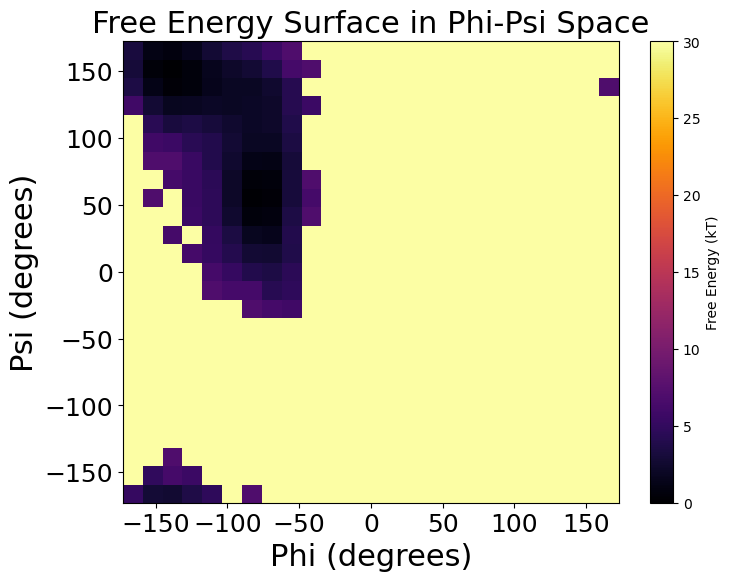

In [6]:
import mdtraj as md
import numpy as np
import matplotlib.pyplot as plt

def compute_fes(traj, bins=25, range_bins=[[-180, 180], [-180, 180]]):
    """
    Computes the free energy surface (FES) in phi-psi space from a molecular dynamics trajectory.
    
    Parameters:
    traj (mdtraj.Trajectory): MDTraj trajectory object
    bins (int): Number of bins to use for the histogram
    range_bins (list): Range of phi and psi values (default: full range [-180, 180])
    
    Returns:
    free_energy (np.ndarray): Free energy surface on the grid
    x_centers (np.ndarray): Phi bin centers
    y_centers (np.ndarray): Psi bin centers
    """
    # Compute phi and psi dihedral angles (convert to degrees)
    phi_indices, phis = md.compute_phi(traj)
    psi_indices, psis = md.compute_psi(traj)
    phis_deg = np.rad2deg(phis[:, 0])
    psis_deg = np.rad2deg(psis[:, 0])
    
    # Create a 2D histogram of phi and psi
    hist, xedges, yedges = np.histogram2d(phis_deg, psis_deg, bins=bins, range=range_bins)
    
    # Avoid log(0) by replacing zeros with a very small number
    hist = np.clip(hist, 1e-10, None)
    
    # Compute free energy surface: F(phi, psi) = -log(histogram)
    free_energy = -np.log(hist)
    
    # Shift F(phi, psi) so that the minimum is zero
    free_energy -= np.min(free_energy)
    
    # Compute the bin centers for plotting
    x_centers = (xedges[:-1] + xedges[1:]) / 2
    y_centers = (yedges[:-1] + yedges[1:]) / 2
    
    return free_energy, x_centers, y_centers

def plot_fes(free_energy, x_centers, y_centers):
    """
    Plots the free energy surface (FES) in phi-psi space.
    
    Parameters:
    free_energy (np.ndarray): Free energy surface on the grid
    x_centers (np.ndarray): Phi bin centers
    y_centers (np.ndarray): Psi bin centers
    """
    plt.figure(figsize=(8, 6))
    
    # Plot using imshow, with origin='lower' to get correct orientation
    extent = [x_centers[0], x_centers[-1], y_centers[0], y_centers[-1]]
    
    # Capture the result of imshow so we can use it for the colorbar
    img = plt.imshow(free_energy.T, extent=extent, origin='lower', aspect='auto', cmap='inferno')

    # Add labels, title, and colorbar
    plt.xlabel('Phi (degrees)', fontsize=22)
    plt.ylabel('Psi (degrees)', fontsize=22)
    plt.title('Free Energy Surface in Phi-Psi Space', fontsize=22)
    plt.xticks(fontsize=18)
    plt.yticks(fontsize=18)
    
    # Use the 'img' object for the colorbar
    plt.colorbar(img, label='Free Energy (kT)')
    
    # Save the figure in the Figures folder
    plt.savefig('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/Figures/Paralle_no_limit_free_energy_surface_phi_psi_300K.png', dpi=300)
    
    # Show the plot
    plt.show()

# Load the trajectory
traj = md.load('/home/yl12451/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/setup/T300/adp_exchange3temps.trr', top='/home/yl12451/comp-lab-class/comp-lab-class-2024/Week5-ParallelTempering/setup/T300/adp_exchange3temps.gro')

# Compute the free energy surface
free_energy, x_centers, y_centers = compute_fes(traj, bins=25)

# Plot the free energy surface
plot_fes(free_energy, x_centers, y_centers)